<a href="https://colab.research.google.com/github/luiz315/Data_Challenge_alura/blob/main/Challenge_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


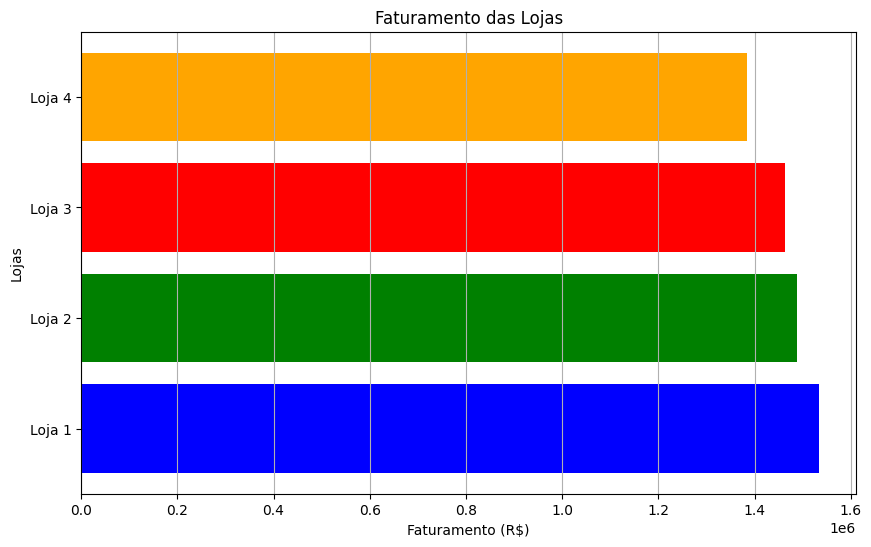

In [6]:
import matplotlib.pyplot as plt

# Calculando o faturamento total de cada loja
faturamento_loja1 = loja1['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Criando listas para os dados
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamento = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

# Criando gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(lojas, faturamento, color=['blue', 'green', 'red', 'orange'])
plt.title('Faturamento das Lojas')
plt.xlabel('Faturamento (R$)')
plt.ylabel('Lojas')
plt.grid(axis='x')

# Exibindo o gráfico
plt.show()

# 2. Vendas por Categoria


In [7]:

import pandas as pd

# URLs dos dados
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregar os dados
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)
df4 = pd.read_csv(url4)

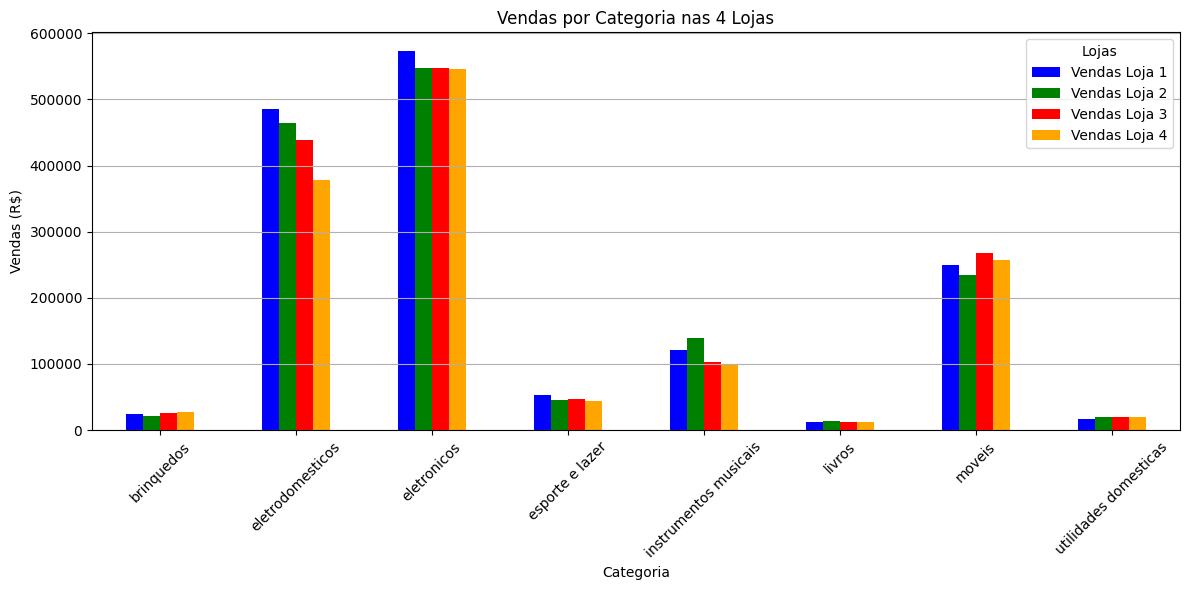

In [8]:
import matplotlib.pyplot as plt

# Agrupar as vendas por categoria para cada loja
# Stripping extra spaces from column names before grouping
vendas_categoria_loja1 = df1.groupby(df1.columns[1].strip())['Preço'].sum().reset_index() # Using df1.columns[1] to select 'Categoria' or a similar named column
vendas_categoria_loja2 = df2.groupby(df2.columns[1].strip())['Preço'].sum().reset_index() # Using df2.columns[1] to select 'Categoria' or a similar named column
vendas_categoria_loja3 = df3.groupby(df3.columns[1].strip())['Preço'].sum().reset_index() # Using df3.columns[1] to select 'Categoria' or a similar named column
vendas_categoria_loja4 = df4.groupby(df4.columns[1].strip())['Preço'].sum().reset_index() # Using df4.columns[1] to select 'Categoria' or a similar named column

# Unir os dados de todas as lojas em um único DataFrame
vendas_categoria = vendas_categoria_loja1.merge(vendas_categoria_loja2, on=vendas_categoria_loja1.columns[0], suffixes=('_loja1', '_loja2'))
vendas_categoria = vendas_categoria.merge(vendas_categoria_loja3, on=vendas_categoria_loja1.columns[0], suffixes=('', '_loja3'))
vendas_categoria = vendas_categoria.merge(vendas_categoria_loja4, on=vendas_categoria_loja1.columns[0], suffixes=('', '_loja4'))

# Renomear as colunas para facilitar a leitura
vendas_categoria.columns = ['Categoria', 'Vendas Loja 1', 'Vendas Loja 2', 'Vendas Loja 3', 'Vendas Loja 4']


# Definir o índice como a categoria
vendas_categoria.set_index('Categoria', inplace=True)

# Criar gráfico de barras
vendas_categoria.plot(kind='bar', figsize=(12, 6),color=['blue', 'green', 'red', 'orange'])
plt.title('Vendas por Categoria nas 4 Lojas')
plt.xlabel('Categoria')
plt.ylabel('Vendas (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Lojas')

# Exibir o gráfico
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd

# URLs dos dados
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

# Carregar os dados
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)
df4 = pd.read_csv(url4)


Colunas da Loja 1: Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')
Colunas da Loja 2: Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')
Colunas da Loja 3: Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')
Colunas da Loja 4: Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')


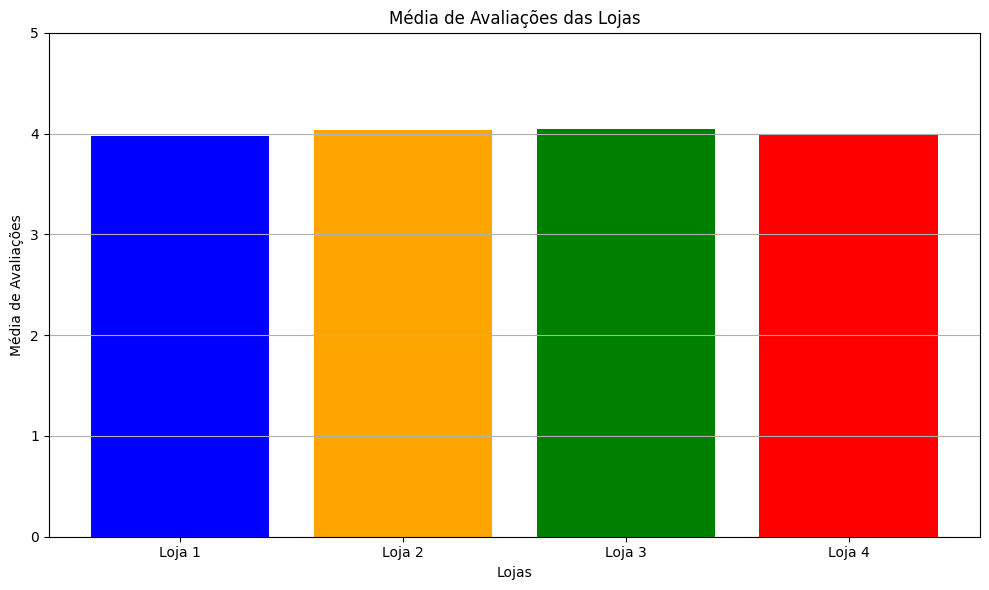

In [9]:
# Removendo espaços extras dos nomes das colunas para todos os dataframes
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()
df3.columns = df3.columns.str.strip()
df4.columns = df4.columns.str.strip()



# Inicializando as médias
media_avaliacoes_loja1 = media_avaliacoes_loja2 = media_avaliacoes_loja3 = media_avaliacoes_loja4 = None

# Calculando a média de avaliações para cada loja
try:
    media_avaliacoes_loja1 = df1['Avaliação da compra'].mean()
    media_avaliacoes_loja2 = df2['Avaliação da compra'].mean()
    media_avaliacoes_loja3 = df3['Avaliação da compra'].mean()
    media_avaliacoes_loja4 = df4['Avaliação da compra'].mean()
except KeyError as e:
    print(f"Erro: {e}. Verifique se a coluna 'Avaliação da compra' existe em todos os DataFrames.")

# Criando um DataFrame com as médias
medias_avaliacoes = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média Avaliações': [media_avaliacoes_loja1, media_avaliacoes_loja2, media_avaliacoes_loja3, media_avaliacoes_loja4]
})

# Criando gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(medias_avaliacoes['Loja'], medias_avaliacoes['Média Avaliações'], color=['blue', 'orange', 'green', 'red'])
plt.title('Média de Avaliações das Lojas')
plt.xlabel('Lojas')
plt.ylabel('Média de Avaliações')
plt.ylim(0, 5)  # Ajuste conforme a escala das avaliações
plt.grid(axis='y')
plt.tight_layout()

# Exibindo o gráfico
plt.show()


# 4. Produtos Mais e Menos Vendidos

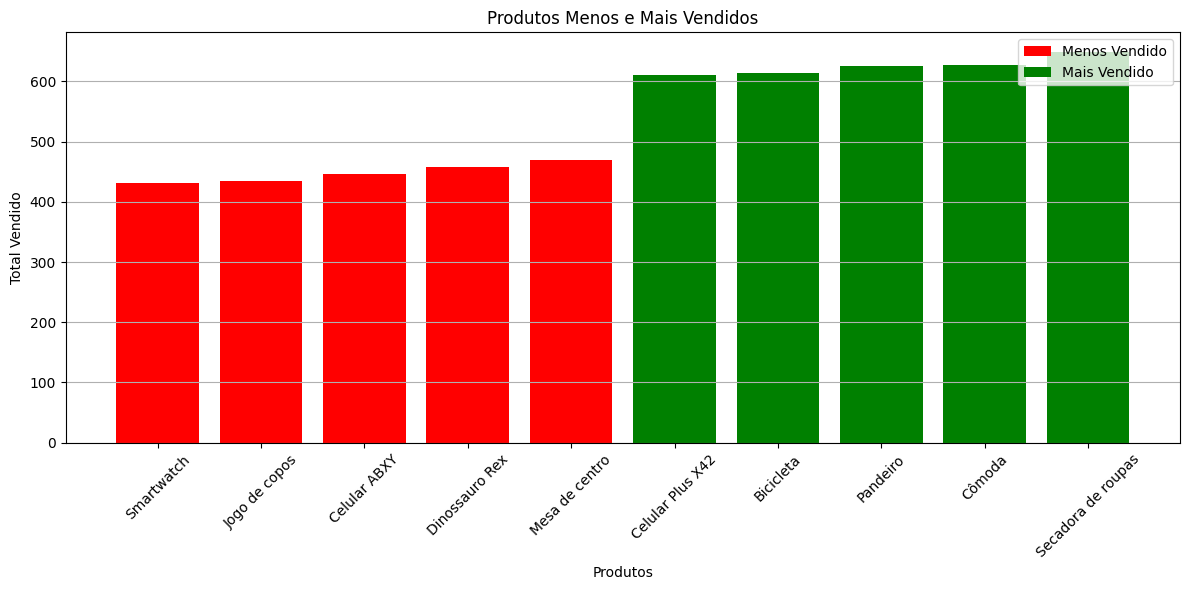

In [11]:
try:
    df1 = pd.read_csv(url1)
    df2 = pd.read_csv(url2)
    df3 = pd.read_csv(url3)
    df4 = pd.read_csv(url4)
except Exception as e:
    print(f"Erro ao carregar os dados: {e}")

# Removendo espaços extras dos nomes das colunas para todos os dataframes
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()
df3.columns = df3.columns.str.strip()
df4.columns = df4.columns.str.strip()



# Agrupando e somando as quantidades vendidas por produto em cada loja
vendas_loja1 = df1.groupby('Produto')['Quantidade de parcelas'].sum().reset_index()
vendas_loja2 = df2.groupby('Produto')['Quantidade de parcelas'].sum().reset_index()
vendas_loja3 = df3.groupby('Produto')['Quantidade de parcelas'].sum().reset_index()
vendas_loja4 = df4.groupby('Produto')['Quantidade de parcelas'].sum().reset_index()

# Unindo os dados de todas as lojas
vendas_total = vendas_loja1.merge(vendas_loja2, on='Produto', how='outer', suffixes=('_loja1', '_loja2'))
vendas_total = vendas_total.merge(vendas_loja3, on='Produto', how='outer', suffixes=('', '_loja3'))
vendas_total = vendas_total.merge(vendas_loja4, on='Produto', how='outer', suffixes=('', '_loja4'))

# Preenchendo NaN com 0
vendas_total.fillna(0, inplace=True)

# Somando as quantidades vendidas
vendas_total['Total Vendido'] = (vendas_total['Quantidade de parcelas'] +
                                  vendas_total.get('Quantidade de parcelas_loja1', 0) +
                                  vendas_total.get('Quantidade de parcelas_loja2', 0) +
                                  vendas_total.get('Quantidade de parcelas_loja3', 0) +
                                  vendas_total.get('Quantidade de parcelas_loja4', 0))

# Obtendo os produtos mais e menos vendidos
produtos_ordenados = vendas_total[['Produto', 'Total Vendido']].sort_values(by='Total Vendido', ascending=True)

# Selecionando os 5 produtos mais e menos vendidos
produtos_menos_vendidos = produtos_ordenados.head(5)
produtos_mais_vendidos = produtos_ordenados.tail(5)

# Concatenar os dois DataFrames
produtos_final = pd.concat([produtos_menos_vendidos, produtos_mais_vendidos])

# Criando gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(produtos_final['Produto'], produtos_final['Total Vendido'],
               color=['red' if x in produtos_menos_vendidos['Produto'].values else 'green' for x in produtos_final['Produto']])

# Adicionando legenda
plt.legend([bars[0], bars[-1]], ['Menos Vendido', 'Mais Vendido'], loc='upper right')

plt.title('Produtos Menos e Mais Vendidos')
plt.xlabel('Produtos')
plt.ylabel('Total Vendido')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Exibir o gráfico
plt.show()

# 5. Frete Médio por Loja


In [12]:

# Remover espaços extras nos nomes das colunas
loja1.columns = loja1.columns.str.strip()
loja2.columns = loja2.columns.str.strip()
loja3.columns = loja3.columns.str.strip()
loja4.columns = loja4.columns.str.strip()

# Extrair a coluna de frete
frete_loja1 = loja1['Frete'].tolist()
frete_loja2 = loja2['Frete'].tolist()
frete_loja3 = loja3['Frete'].tolist()
frete_loja4 = loja4['Frete'].tolist()


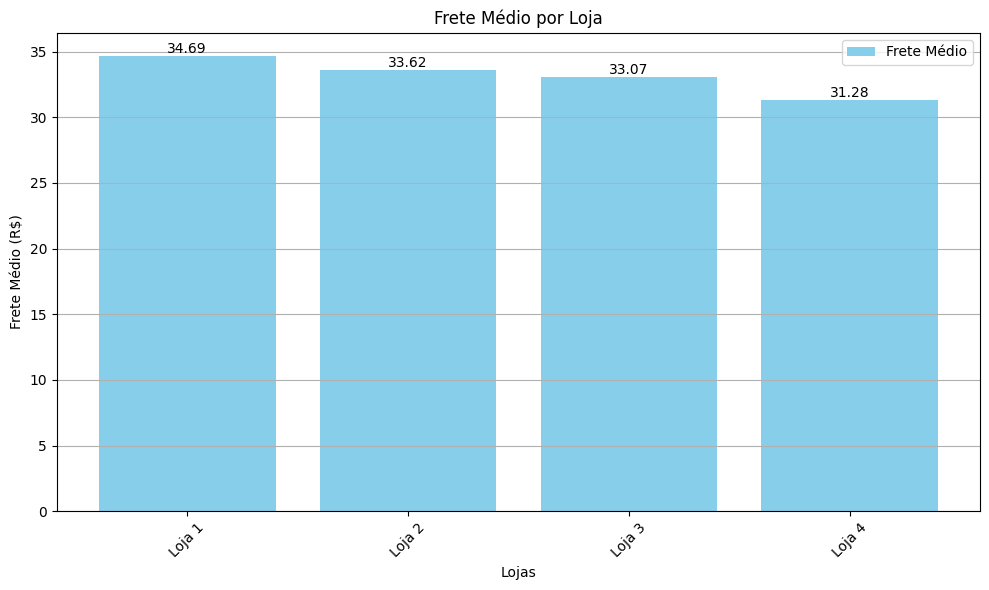

In [13]:
# URLs dos dados
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/main/base-de-dados-challenge-1/loja_4.csv"

# Carregar os dados
loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

# Remover espaços extras nos nomes das colunas
loja1.columns = loja1.columns.str.strip()
loja2.columns = loja2.columns.str.strip()
loja3.columns = loja3.columns.str.strip()
loja4.columns = loja4.columns.str.strip()

# Extrair a coluna de frete
frete_loja1 = loja1['Frete'].tolist()
frete_loja2 = loja2['Frete'].tolist()
frete_loja3 = loja3['Frete'].tolist()
frete_loja4 = loja4['Frete'].tolist()

# Calcular o frete médio por loja
frete_medio_loja1 = sum(frete_loja1) / len(frete_loja1)
frete_medio_loja2 = sum(frete_loja2) / len(frete_loja2)
frete_medio_loja3 = sum(frete_loja3) / len(frete_loja3)
frete_medio_loja4 = sum(frete_loja4) / len(frete_loja4)

# Criar um DataFrame com os resultados
frete_medio = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Médio': [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]
})

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(frete_medio['Loja'], frete_medio['Frete Médio'], color='skyblue', label='Frete Médio')

# Adicionar título e rótulos
plt.title('Frete Médio por Loja')
plt.xlabel('Lojas')
plt.ylabel('Frete Médio (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adicionar anotações com os valores de frete médio
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()
